# **ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА**

#### HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

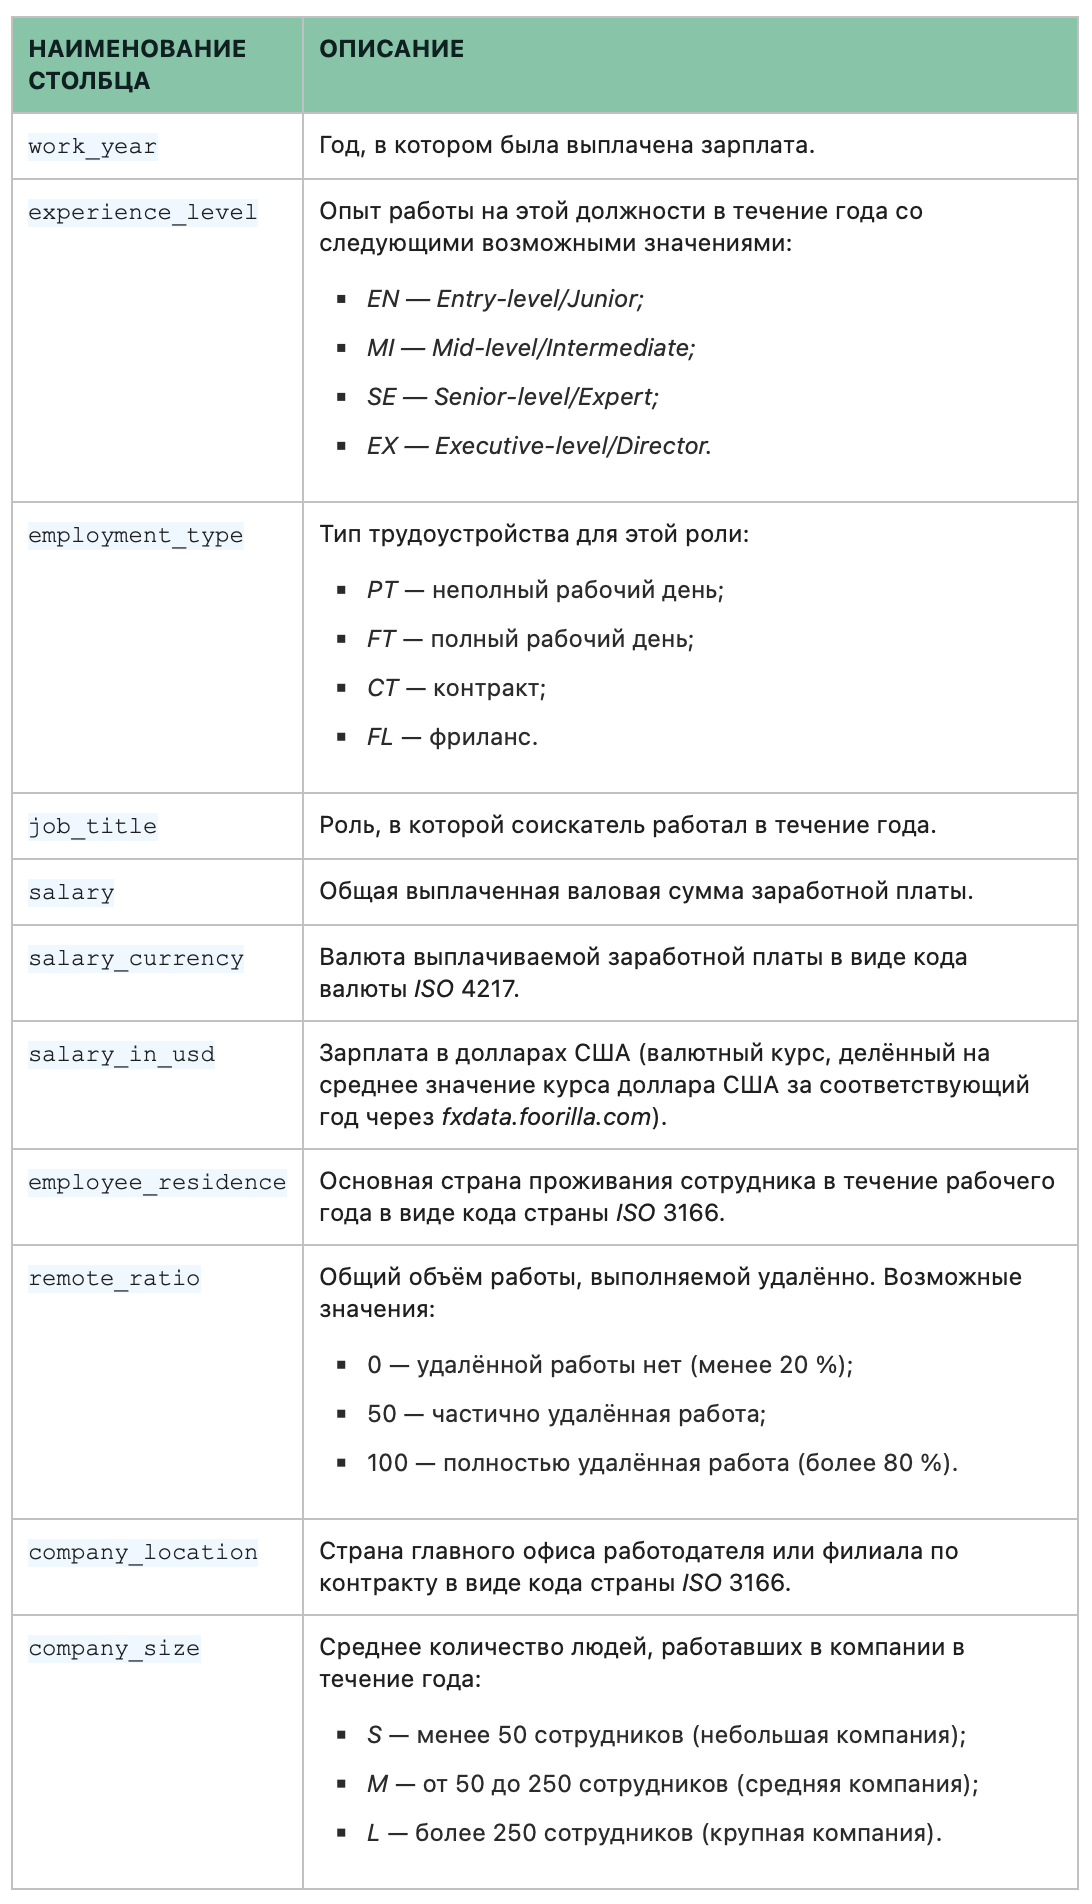

Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе своего анализа вы должны:
1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы HR-агентства:
* Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
* Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
* Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
* Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

* тесты для количественного признака:
* * для одной выборки;
* * для двух выборок;
* * для нескольких выборок;

* тест для категориальных признаков.

In [1487]:
import pandas as pd
from IPython.display import Markdown
import plotly.express as px
import plotly.io as pio
import numpy as np
from pycountry_convert import country_alpha2_to_country_name

# pio.renderers.default = 'png'
pio.templates.default = 'plotly_dark'

## **Загрузка и обработка данных**

In [1488]:
# Знакомсво с данными
df = pd.read_csv('data/ds_salaries.csv', index_col=0)
display(Markdown('### Просматриваем набор данных')),
display(df.sample(5)),
display(Markdown('### Характеристики категориальных столбцов')),
display(df.describe(include=object).T),
display(Markdown('### Характеристики числовых столбцов')),
display(df.describe().T)
display(Markdown('### Характеристики столбцов')),
df.info(),
print('\n')
print('Количество дубликатов:', df.duplicated().sum(), '\n')
print('Количество пропусков:', df.isna().sum().sum(), '\n')
nums_list_col = [col for col in df.columns if df[col].dtype != object]
cat_list_col = [col for col in df.columns if df[col].dtype == object]
print(f'Количество числовых столбцов: {len(nums_list_col)}\n{nums_list_col}\n')
print(f'Количество категориальных столбцов: {len(cat_list_col)}\n{cat_list_col}')

### Просматриваем набор данных

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
153,2021,EN,FT,Data Scientist,13400,USD,13400,UA,100,UA,L
309,2022,EX,FT,Data Engineer,242000,USD,242000,US,100,US,M
79,2021,EN,FT,Data Analyst,80000,USD,80000,US,100,US,M
592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
564,2022,SE,FT,Data Analyst,116150,USD,116150,US,100,US,M


### Характеристики категориальных столбцов

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


### Характеристики числовых столбцов

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


### Характеристики столбцов

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


Количество дубликатов: 42 

Количество пропусков: 0 

Количество числовых столбцов: 4
['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

Количество категориальных столбцов: 7
['experience_level', 'employment_type', '

### Удаляем дубликаты

In [1489]:
df.drop_duplicates(inplace=True)
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


### Удаляем не информативные признаки

К неинформативным признакам относятся ``salary``, ``salary_currency`` так как у нас уже есть признак ``salary_in_usd``, который является общим и где все зарплаты приведены к единому масштабу **USD**.

In [1490]:
df.drop(columns=['salary', 'salary_currency'], inplace=True)

### Закодируем признаки 

* В столбце ``remote_ratio`` заменим **0**, **50** и **100** на '**Не удаленная**' '**Частично удаленная**' '**Полностью удаленная**'
* В столбце ``experience_level`` заменим абривиатуры на более понятные значения **EN - Junior**, **MI - Middle**, **SE - Senior**, **EX - Director**
* В столбце ``employment_type`` заменим абривиатуры **PT - Неполный рабочий день**, **FT - Полный рабочий день**, **CT — Контракт**, **FL — Фриланс**
* В столбцк ``company_size`` заменим **S**, **M**, **L**, на **Небольшая компания**, **Cредняя компания**, **Крупная компания**

In [1491]:
# Функция для перевода значений в читабельный вид в столбце remote_ratio
def remote_ratio(remote_ratio):
    if remote_ratio == 0:
        return 'Не удаленная'
    elif remote_ratio == 50:
        return 'Частичная удаленная'
    else:
        return 'Полностью удаленная'
# Функция для перевода значений в читабельный вид в столбце experience_level
def experience_level(experience_level):
    if experience_level == 'EN':
        return 'Junior'
    elif experience_level == 'MI':
        return 'Middle'
    elif experience_level == 'SE':
        return 'Senior'
    else:
        return 'Director'
# Функция для перевода значений в читабельный вид в столбце employment_type 
def employment_type(employment_type):
    if employment_type == 'PT':
        return 'Неполный рабочий день'
    elif employment_type == 'FT':
        return 'Полный рабочий день'
    elif employment_type == 'CT':
        return 'Контракт'
    else:
        return 'Фриланс'
# Функция для перевода значений в читабельный вид в столбце company_size    
def company_size(company_size):
    if company_size == 'S':
        return 'Небольшая компания'
    elif company_size == 'M':
        return 'Cредняя компания'
    else:
        return 'Крупная компания'

df['remote_ratio'] = df['remote_ratio'].apply(remote_ratio)
df['experience_level'] = df['experience_level'].apply(experience_level)
df['employment_type'] = df['employment_type'].apply(employment_type)
df['company_size'] = df['company_size'].apply(company_size)

## Разведывательный анализ данных




### Визуальный анализ всех данных

In [1492]:
fig = px.histogram(
    df,
    x='salary_in_usd',
    title='Распределение зарплат в датасете',
    width=1000,
    height=500,
    color_discrete_sequence=['#11ffac'],
    text_auto=True,
    marginal='box',
    labels={'salary_in_usd': 'ЗП USD'},
)
fig

По графику видно, что распределение зарплат близко к нормальному Построим границы $(\mu - 3\sigma)$ и $(\mu + 3\sigma)$. (метод трёх сигм для нормального распределения):

Прологарифмируем признак, что бы привести его к нормальному распределению:

* Белая линия обозначает среднее $\mu$
* Красные пунктирные линии обозначают $\mu \pm 3\sigma$
* Красная область считаться выбросами.

In [1493]:
df['salary_log'] = np.log(df['salary_in_usd'])

fig = px.histogram(
    df,
    x='salary_log',
    title=f'Распределение признака зарплаты в логарифмическом масштабе',
    width=1000,
    height=500,
    color_discrete_sequence=['#11ffac'],
    text_auto=True,
    marginal='box',
    labels={'salary_log': 'log(ЗП)'},
).add_vline(
    x=df['salary_log'].mean() - 3*df['salary_log'].std(),
    line_dash='dash',
    line_color='#F08080'
).add_vline(
    x=df['salary_log'].mean() + 3*df['salary_log'].std(),
    line_dash='dash',
    line_color='#F08080'
).add_vrect(
    x0=7.8,
    x1=df['salary_log'].mean() - 3*df['salary_log'].std(),
    fillcolor='#ff0000',
    line_width=0,
    opacity=0.4
).add_vline(
    x=df['salary_log'].mean(),
    line_color='#fff'
)
fig

In [1494]:
px.histogram(
    df,
    title='Распределение временных промежутков в данных',
    x='work_year',
    text_auto=True,
    height=500,
    width=1000,
    color='work_year',
    labels={'work_year': 'Год'},
    nbins=3,
).update_xaxes(tickmode='array', tickvals=[2020, 2021, 2022])

По графику видно, что в датасете преобладют данные за 2021 и 2022 год.

In [1495]:
px.pie(
    df,
    title='Распределение опыта работа',
    names='experience_level',
    width=1000,
    height=500,
    hole=0.4,
).update_layout(
    legend=dict(title="Опыт работы")
).update_traces(
    textfont_size=15, 
    marker=dict(line=dict(color='#000', width=2))
)

In [1496]:
px.pie(
    df,
    title='Распределение типов трудоустройсва',
    names='employment_type',
    width=1000,
    height=500,
    hole=0.4,
).update_layout(
    legend=dict(title="Тип трудоустройсва")
).update_traces(
    textfont_size=15, 
    marker=dict(line=dict(color='#000', width=2))
)

In [1497]:
grouped_job = df.groupby(by='job_title', as_index=False)['salary_in_usd'].count().rename(columns={'salary_in_usd': 'count'}).sort_values(by='count',ascending=False).head(10)

px.bar(
    data_frame=grouped_job,
    y='job_title',
    x='count',
    title='Топ-10 самых популярных должностей',
    width=1000,
    height=700,
    color='job_title',
    text_auto=True,
    labels={'count': 'Количество наблюдений', 'job_title': 'Название должности'}
).show()

Конвертируем столбцы со странами из формата ISO 3166-2 в названия стран для удобства визуализации.

In [1498]:
df['employee_residence'] = df['employee_residence'].apply(country_alpha2_to_country_name)
df['company_location'] = df['company_location'].apply(country_alpha2_to_country_name)

grouped_emp_res = df.groupby(by='employee_residence',as_index=False)['company_location'].count().rename(columns={'company_location': 'count'})
grouped_comp_loc = df.groupby(by='company_location',as_index=False)['employee_residence'].count().rename(columns={'employee_residence': 'count'})

px.choropleth(
    grouped_emp_res,
    locationmode='country names',
    locations='employee_residence',
    color='count',
    color_continuous_scale=px.colors.diverging.Temps,
    width=1000,
    height=700,
    title='Распределение соискателей по странам'
).update_layout(coloraxis_colorbar_title='Количество<br>наблюдений').show()

px.choropleth(
    grouped_comp_loc,
    locationmode='country names',
    locations='company_location',
    color='count',
    color_continuous_scale=px.colors.diverging.Temps,
    width=1000,
    height=700,
    title='Распределение работодателей по странам'
).update_layout(coloraxis_colorbar_title='Количество<br>наблюдений').show()

In [1499]:
px.pie(
    df,
    names='remote_ratio',
    width=1000,
    height=500,
    title='Распределение удалённой работы',
    hole=0.4
).update_traces(
    textinfo='percent+label',
    textfont_size=15,
    textposition='inside',
    marker=dict(line=dict(color='#000', width=2))
).update_layout(
    legend=dict(title="Тип "),
).show()

In [1500]:
px.pie(
    df,
    names='company_size',
    width=1000,
    height=500,
    title='Распределения количества сотрудников в компании',
    hole=0.4
).update_traces(
    textinfo='percent+label',
    textposition='inside',
    textfont_size=15,
    marker=dict(line=dict(color='#000', width=2))
).update_layout(
    legend=dict(title="Тип ")
).show()

In [1501]:
salary_pivot = df.pivot_table(
    values='salary_in_usd', 
    columns='experience_level',
    index='company_size',
    aggfunc='median'
)
px.imshow(
    salary_pivot,
    text_auto=True,
    title='Зависимость медианной зарплаты от размера компании и опыта работы',
    width=1000,
    height=500,
    labels={
        'y': '<b>Размер компании</b>',
        'x': '<b>Опыт работы</b>'
    },
).update_layout(coloraxis_colorbar_title='Зарплата (<i>USD</i>)')

In [1502]:
grouped_job_salary = df.groupby(by='job_title', as_index=False)['salary_in_usd'].median().sort_values(by='salary_in_usd',ascending=False).head(10)

px.bar(
    grouped_job_salary,
    y='job_title',
    x='salary_in_usd',
    width=1000,
    height=700,
    title='Топ-10 должностей с наивысшей медианной ЗП',
    color='job_title',
    labels={
        'job_title': 'Название должности',
        'salary_in_usd': 'Зарплата (<i>USD</i>)'
    },
    text_auto=True
).update_layout(showlegend=False)

In [1503]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_log
0,2020,Middle,Полный рабочий день,Data Scientist,79833,Germany,Не удаленная,Germany,Крупная компания,11.287692
1,2020,Senior,Полный рабочий день,Machine Learning Scientist,260000,Japan,Не удаленная,Japan,Небольшая компания,12.468437
2,2020,Senior,Полный рабочий день,Big Data Engineer,109024,United Kingdom,Частичная удаленная,United Kingdom,Cредняя компания,11.599323
3,2020,Middle,Полный рабочий день,Product Data Analyst,20000,Honduras,Не удаленная,Honduras,Небольшая компания,9.903488
4,2020,Senior,Полный рабочий день,Machine Learning Engineer,150000,United States,Частичная удаленная,United States,Крупная компания,11.918391
...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Полный рабочий день,Data Engineer,154000,United States,Полностью удаленная,United States,Cредняя компания,11.944708
603,2022,Senior,Полный рабочий день,Data Engineer,126000,United States,Полностью удаленная,United States,Cредняя компания,11.744037
604,2022,Senior,Полный рабочий день,Data Analyst,129000,United States,Не удаленная,United States,Cредняя компания,11.767568
605,2022,Senior,Полный рабочий день,Data Analyst,150000,United States,Полностью удаленная,United States,Cредняя компания,11.918391
